# Visualización de datos 

In [37]:
#install.packages("tidyverse")
install.packages("gganimate")
install.packages("plotly")
install.packages("gifski")
install.packages("RColorBrewer")
install.packages("wesanderson")
library(gifski)
library(tidyverse)
library(gganimate)
library(plotly)
library(RColorBrewer)
library(wesanderson)


Warning message:
"package 'gganimate' is in use and will not be installed"
Warning message:
"package 'plotly' is in use and will not be installed"
Warning message:
"package 'gifski' is in use and will not be installed"
Warning message:
"package 'RColorBrewer' is in use and will not be installed"
Warning message:
"package 'wesanderson' is in use and will not be installed"


In [36]:
# codigo limpieza y manipulación 
casos_diarios <-  read.csv(file = "Casos_Diarios_Estado_Nacional.csv")
casos_diario_list <- gather(casos_diarios,key ="dias",value="infectados",4:856)

normalizarfecha <- function(fecha){
return(str_replace_all(fecha,"X","")  %>% str_replace_all("\\.","/"))
}

cod_Meses <- function(x) {

labels_meses <- c(
    "Ene","Feb","Mar","Abr","May","Jun",
    "Jul","Ago","Sep","Oct","Nov","Dic")

    return(factor(x,levels = (1:12),labels = labels_meses))
    
    }

fecha = map(casos_diario_list[4],normalizarfecha)
casos_diarios_fecha <- cbind(casos_diario_list[c(TRUE,TRUE,TRUE,FALSE,TRUE)],fecha)
casos_diarios_fecha <- casos_diarios_fecha[c(1,2,3,5,4)]

datos <- separate( data = casos_diarios_fecha,
                   col =dias,
                   into = c("dia","mes","año"),
                   sep = '/',
                   remove = FALSE)


datos<-datos%>%mutate(mest_txt=cod_Meses(as.integer(mes)))%>%mutate(consecutivo=1:28149)
str(datos)
head(datos)

'data.frame':	28149 obs. of  10 variables:
 $ cve_ent    : int  1 2 3 4 7 8 9 5 6 10 ...
 $ poblacion  : int  1434635 3634868 804708 1000617 5730367 3801487 9018645 3218720 785153 1868996 ...
 $ nombre     : chr  "AGUASCALIENTES" "BAJA CALIFORNIA" "BAJA CALIFORNIA SUR" "CAMPECHE" ...
 $ dias       : chr  "26/02/2020" "26/02/2020" "26/02/2020" "26/02/2020" ...
 $ dia        : chr  "26" "26" "26" "26" ...
 $ mes        : chr  "02" "02" "02" "02" ...
 $ año        : chr  "2020" "2020" "2020" "2020" ...
 $ infectados : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mest_txt   : Factor w/ 12 levels "Ene","Feb","Mar",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ consecutivo: int  1 2 3 4 5 6 7 8 9 10 ...


,cve_ent,poblacion,nombre,dias,dia,mes,año,infectados,mest_txt,consecutivo
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<fct>,<int>
1,1,1434635,AGUASCALIENTES,26/02/2020,26,02,2020,0,Feb,1
2,2,3634868,BAJA CALIFORNIA,26/02/2020,26,02,2020,0,Feb,2
3,3,804708,BAJA CALIFORNIA SUR,26/02/2020,26,02,2020,0,Feb,3
4,4,1000617,CAMPECHE,26/02/2020,26,02,2020,0,Feb,4
5,7,5730367,CHIAPAS,26/02/2020,26,02,2020,0,Feb,5
6,8,3801487,CHIHUAHUA,26/02/2020,26,02,2020,0,Feb,6


## plot básico

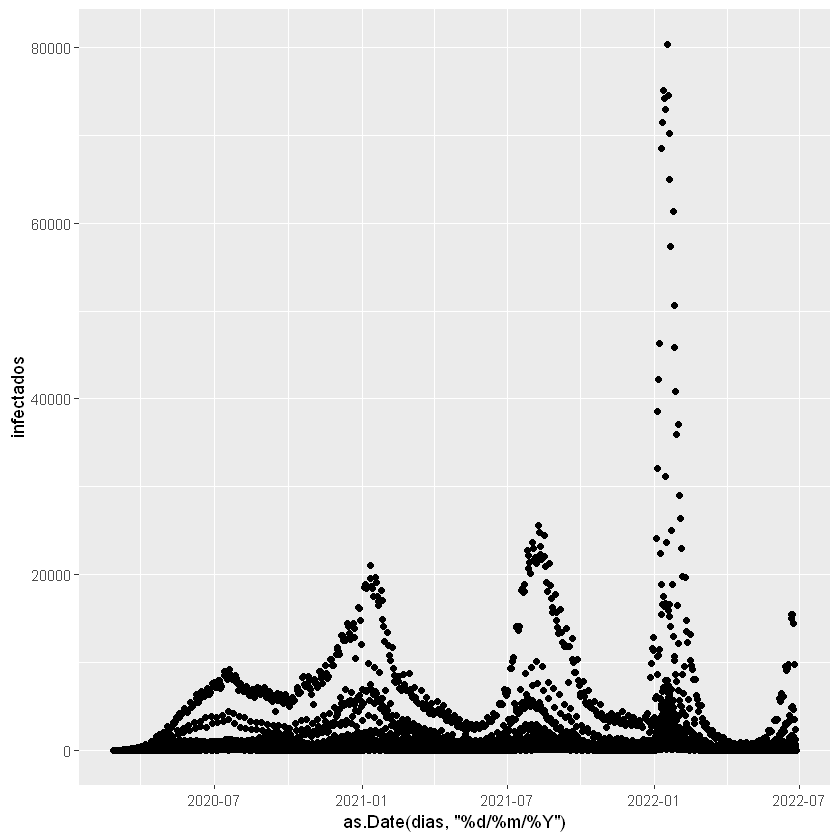

In [19]:



datos%>%ggplot(aes(x=as.Date(dias,"%d/%m/%Y"),y=infectados))+
        geom_point()


## Añadiendo gráficas y filtrado

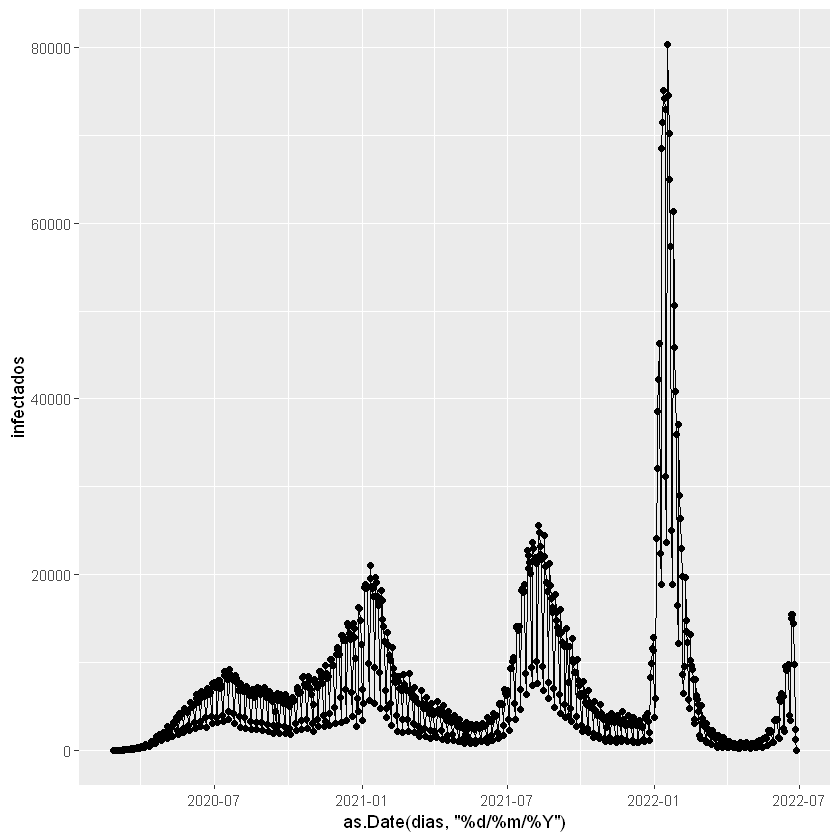

In [9]:
datos%>% filter(nombre=="Nacional")%>%
        ggplot(aes(x=as.Date(dias,"%d/%m/%Y"),y=infectados))+
        geom_point()+
        geom_line()

`geom_smooth()` using formula 'y ~ s(x, bs = "cs")'



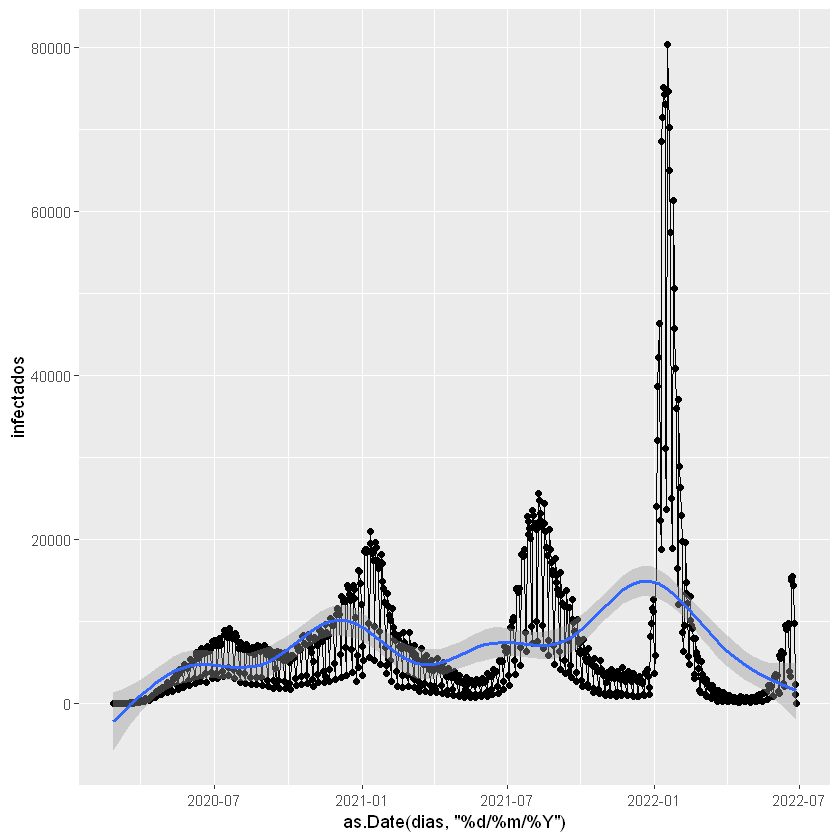

In [20]:
datos%>% filter(nombre=="Nacional")%>%
        ggplot(aes(x=as.Date(dias,"%d/%m/%Y"),y=infectados))+
        geom_point()+geom_line()+
        stat_smooth(method="gam",aes(x=as.Date(dias,"%d/%m/%Y"),y=infectados))

## limitar los ejes e incluir un or en el filter

`geom_smooth()` using formula 'y ~ s(x, bs = "cs")'



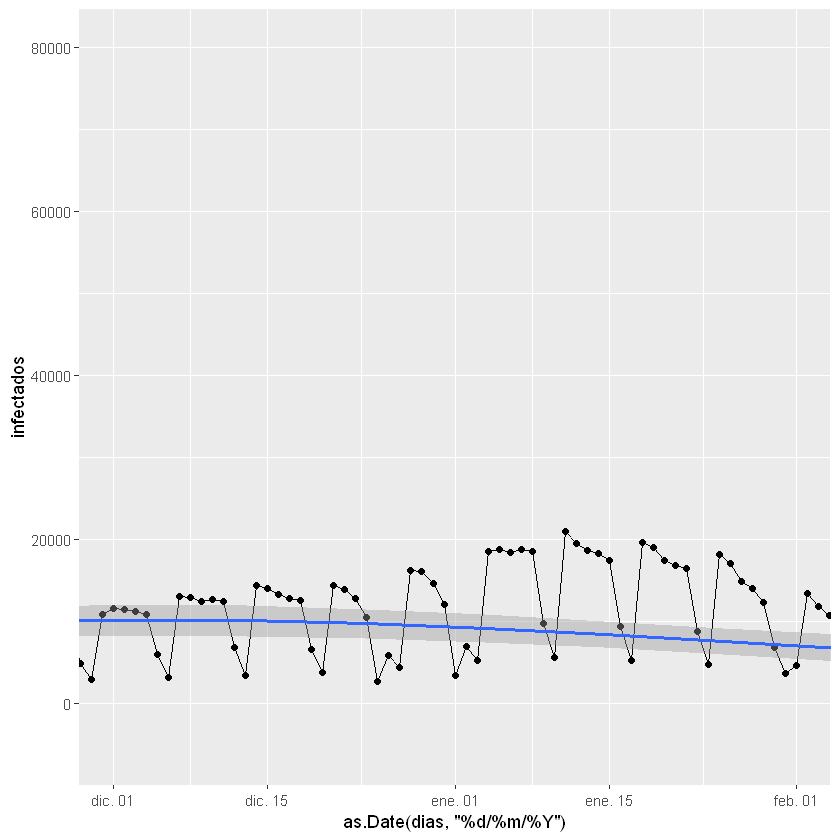

In [21]:
datos%>% filter(nombre=="Nacional")%>%filter(año=="2020" || año=="2021")%>%
        ggplot(aes(x=as.Date(dias,"%d/%m/%Y"),y=infectados))+
        geom_point()+geom_line()+
        stat_smooth(method="gam",aes(x=as.Date(dias,"%d/%m/%Y"),y=infectados))+
        coord_cartesian(xlim=c(as.Date("01/12/2020","%d/%m/%Y"),as.Date("01/02/2021","%d/%m/%Y")))

## Añadir series y modificar estructura de datos

In [27]:
datos<-datos%>%transform(dias=as.Date(dias,"%d/%m/%Y"))
str(datos)
unique(datos$nombre)

'data.frame':	28149 obs. of  10 variables:
 $ cve_ent    : int  1 2 3 4 7 8 9 5 6 10 ...
 $ poblacion  : int  1434635 3634868 804708 1000617 5730367 3801487 9018645 3218720 785153 1868996 ...
 $ nombre     : chr  "AGUASCALIENTES" "BAJA CALIFORNIA" "BAJA CALIFORNIA SUR" "CAMPECHE" ...
 $ dias       : Date, format: "2020-02-26" "2020-02-26" ...
 $ dia        : chr  "26" "26" "26" "26" ...
 $ mes        : chr  "02" "02" "02" "02" ...
 $ año        : chr  "2020" "2020" "2020" "2020" ...
 $ infectados : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mest_txt   : Factor w/ 12 levels "Ene","Feb","Mar",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ consecutivo: int  1 2 3 4 5 6 7 8 9 10 ...


[1] "AGUASCALIENTES"      "BAJA CALIFORNIA"     "BAJA CALIFORNIA SUR"
 [4] "CAMPECHE"            "CHIAPAS"             "CHIHUAHUA"          
 [7] "DISTRITO FEDERAL"    "COAHUILA"            "COLIMA"             
[10] "DURANGO"             "GUANAJUATO"          "GUERRERO"           
[13] "HIDALGO"             "JALISCO"             "MEXICO"             
[16] "MICHOACAN"           "MORELOS"             "NAYARIT"            
[19] "NUEVO LEON"          "OAXACA"              "PUEBLA"             
[22] "QUERETARO"           "QUINTANA ROO"        "SAN LUIS POTOSI"    
[25] "SINALOA"             "SONORA"              "TABASCO"            
[28] "TAMAULIPAS"          "TLAXCALA"            "VERACRUZ"           
[31] "YUCATAN"             "ZACATECAS"           "Nacional"

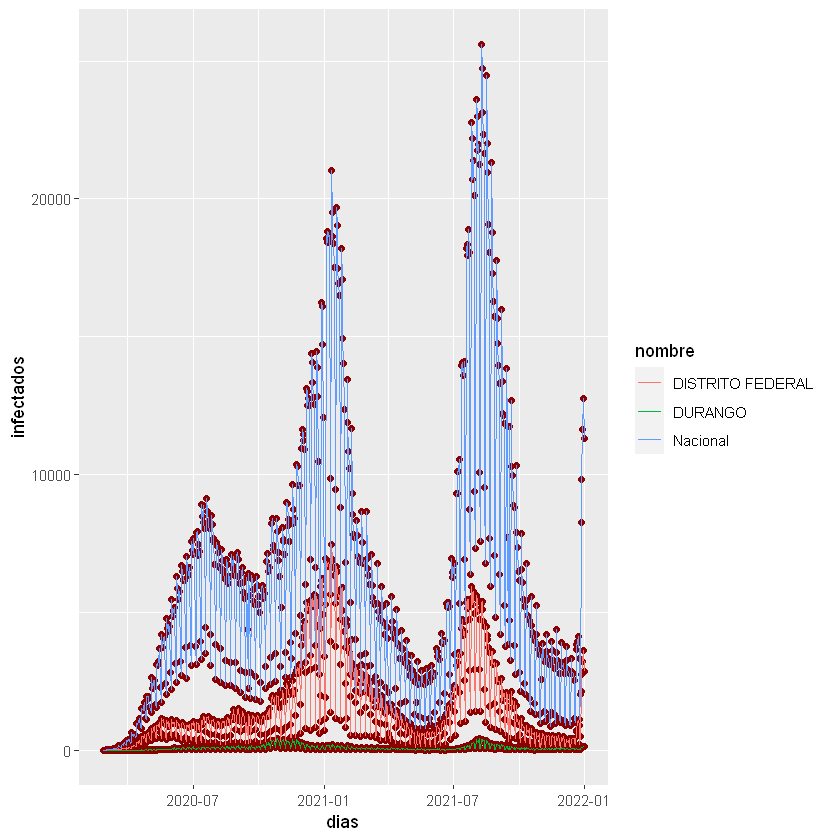

In [26]:
datos%>% filter(nombre%in%c("Nacional","DURANGO","DISTRITO FEDERAL"))%>%filter(año%in%c("2020","2021"))%>%
        ggplot(aes(x=dias,y=infectados,group=nombre,color=nombre))+
        geom_point(fill="#A4A4A4",color="darkred")+geom_line()#+
#        stat_smooth(method="gam",aes(x=as.Date(dias,"%d/%m/%Y"),y=infectados))+
#        coord_cartesian(xlim=c(as.Date("01/12/2020","%d/%m/%Y"),as.Date("01/02/2021","%d/%m/%Y")))

## Animar

In [34]:
p1<- datos%>% filter(nombre%in%c("Nacional","DURANGO","DISTRITO FEDERAL"))%>%filter(año%in%c("2020","2021"))%>%
        ggplot(aes(x=dias,y=infectados,group=nombre,color=nombre))+
        geom_point(fill="#A4A4A4",color="darkred")+geom_line()+
#        stat_smooth(method="gam",aes(x=as.Date(dias,"%d/%m/%Y"),y=infectados))+
        coord_cartesian(xlim=c(as.Date("01/12/2020","%d/%m/%Y"),as.Date("01/02/2021","%d/%m/%Y")))+
        transition_reveal(dias)


mi_gift<-animate(p1,width=1600,height=800,render=gifski_renderer(loop=TRUE))
anim_save(filename="animacion.gif")


Rendering [>-------------------------------------------] at 9.3 fps ~ eta: 10s

Rendering [>-------------------------------------------] at 8.4 fps ~ eta: 12s

Rendering [=>------------------------------------------] at 8.2 fps ~ eta: 12s

Rendering [=>------------------------------------------] at 8.1 fps ~ eta: 12s

Rendering [==>-------------------------------------------] at 8 fps ~ eta: 12s

Rendering [===>------------------------------------------] at 8 fps ~ eta: 12s

Rendering [===>----------------------------------------] at 7.9 fps ~ eta: 11s

Rendering [===>----------------------------------------] at 7.8 fps ~ eta: 11s

Rendering [====>---------------------------------------] at 7.8 fps ~ eta: 11s

Rendering [=====>--------------------------------------] at 7.7 fps ~ eta: 11s

Rendering [======>-------------------------------------] at 7.7 fps ~ eta: 11s

Rendering [=======>------------------------------------] at 7.7 fps ~ eta: 11s

Rendering [=======>--------------------

<img src="animacion.gif" height="100">